## Getting Started with FastDup

This is a walkthrough on how to install and run FastDup to find image-duplicates & \
near-duplicated on the hotel-id-to-combat-human-trafficking-2022-fgvc9 
cvpr-2022 workshop competition.

Kaggle competition link: https://www.kaggle.com/competitions/hotel-id-to-combat-human-trafficking-2022-fgvc9/data

### 1. Installing FastDup

In [1]:
!pip install fastdup

### 2. Downloading Competition Data
Note: see instruction on kaggle api here: https://github.com/Kaggle/kaggle-api 

In [4]:
import os
import shutil
data_dir = 'hotel-id-to-combat-human-trafficking-2022-fgvc9/data'

if not os.path.exists(data_dir):
    os.makedirs(data_dir)

In [17]:
!kaggle competitions download -c hotel-id-to-combat-human-trafficking-2022-fgvc9

100%|██████████████████████████████████████▉| 14.0G/14.0G [00:57<00:00, 335MB/s]
100%|███████████████████████████████████████| 14.0G/14.0G [01:03<00:00, 236MB/s]


In [5]:
!unzip -q hotel-id-to-combat-human-trafficking-2022-fgvc9.zip -d hotel-id-to-combat-human-trafficking-2022-fgvc9/data
shutil.rmtree('hotel-id-to-combat-human-trafficking-2022-fgvc9/data/train_masks')

### 3. Running FastDup

In [19]:
import fastdup
print(fastdup.__version__)

0.34


In [21]:
results_dir = 'hotel-id-to-combat-human-trafficking-2022-fgvc9/results'

fastdup.run(input_dir=data_dir, work_dir=results_dir)

Wrote  total of 44704 features, found 0 bad images
Found total 44704 images to run on
0) Going to train faiss
0) Finished train() faiss
7) Finished add() faiss
7) Finished write_index() faiss
Stored faiss index file hotel-id-to-combat-human-trafficking-2022-fgvc9/results/faiss.index
9) Finished search() faissTotal time took 198656 ms
Found a total of 1239 fully identical images (d>0.990), which are 1.39 %
Found a total of 17 nearly identical images(d>0.980), which are 0.02 %
Found a total of 8567 above threshold images (d>0.900), which are 9.58 %
Found a total of 26822 outlier images         (d<0.300), which are 30.00 %
Min distance found 0.504 max distance 1.000
Going to loop over dir hotel-id-to-combat-human-trafficking-2022-fgvc9/data
Found total 44704 images to run on


### 4. Displaying Similarity Gallery

In [23]:
similarity_file = os.path.join(results_dir, 'similarity.csv')

gallery_save_path = os.path.join(results_dir, 'gallery')
if not os.path.exists(save_path):
    os.makedirs(save_path)

fastdup.create_duplicates_gallery(similarity_file, save_path=gallery_save_path, num_images=10, descending=True)

100%|██████████| 10/10 [00:00<00:00, 17.79it/s]


Stored similarity visual view in  hotel-id-to-combat-human-trafficking-2022-fgvc9/results/gallery/similarity.html


,image,distance,from,to
0,,1.0,hotel-id-to-combat-human-trafficking-2022-fgvc9/data/train_images/28636/000021132.jpg,hotel-id-to-combat-human-trafficking-2022-fgvc9/data/train_images/28636/000021134.jpg
1,,1.0,hotel-id-to-combat-human-trafficking-2022-fgvc9/data/train_images/28636/000021136.jpg,hotel-id-to-combat-human-trafficking-2022-fgvc9/data/train_images/28636/000021139.jpg
2,,1.0,hotel-id-to-combat-human-trafficking-2022-fgvc9/data/train_images/28636/000021138.jpg,hotel-id-to-combat-human-trafficking-2022-fgvc9/data/train_images/28636/000021140.jpg
3,,1.0,hotel-id-to-combat-human-trafficking-2022-fgvc9/data/train_images/28636/000021131.jpg,hotel-id-to-combat-human-trafficking-2022-fgvc9/data/train_images/28636/000021140.jpg
4,,1.0,hotel-id-to-combat-human-trafficking-2022-fgvc9/data/train_images/28636/000021131.jpg,hotel-id-to-combat-human-trafficking-2022-fgvc9/data/train_images/28636/000021138.jpg
5,,1.0,hotel-id-to-combat-human-trafficking-2022-fgvc9/data/train_images/28636/000021132.jpg,hotel-id-to-combat-human-trafficking-2022-fgvc9/data/train_images/28636/000021141.jpg
6,,1.0,hotel-id-to-combat-human-trafficking-2022-fgvc9/data/train_images/28636/000021137.jpg,hotel-id-to-combat-human-trafficking-2022-fgvc9/data/train_images/28636/000021139.jpg
7,,1.0,hotel-id-to-combat-human-trafficking-2022-fgvc9/data/train_images/28636/000021137.jpg,hotel-id-to-combat-human-trafficking-2022-fgvc9/data/train_images/28636/000021136.jpg
8,,1.0,hotel-id-to-combat-human-trafficking-2022-fgvc9/data/train_images/88282/000006535.jpg,hotel-id-to-combat-human-trafficking-2022-fgvc9/data/train_images/88282/000006526.jpg
9,,1.0,hotel-id-to-combat-human-trafficking-2022-fgvc9/data/train_images/88282/000006538.jpg,hotel-id-to-combat-human-trafficking-2022-fgvc9/data/train_images/88282/000006529.jpg

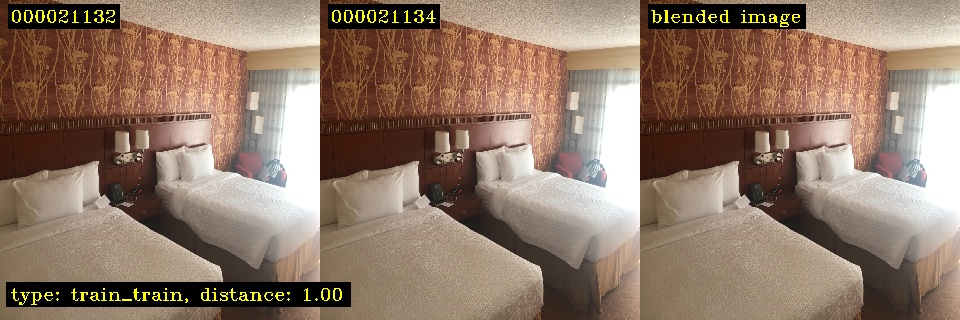
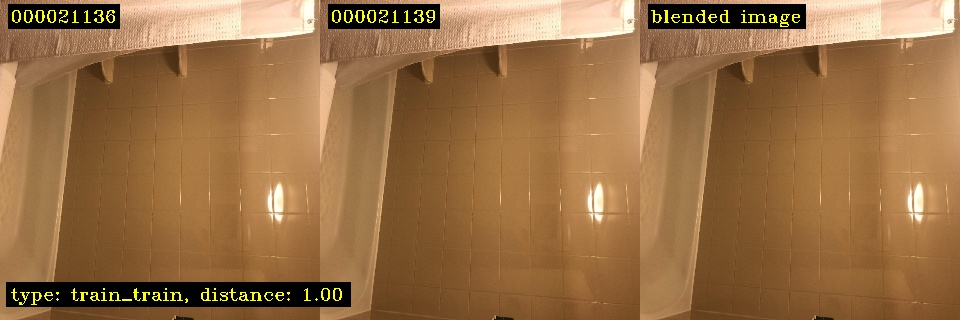
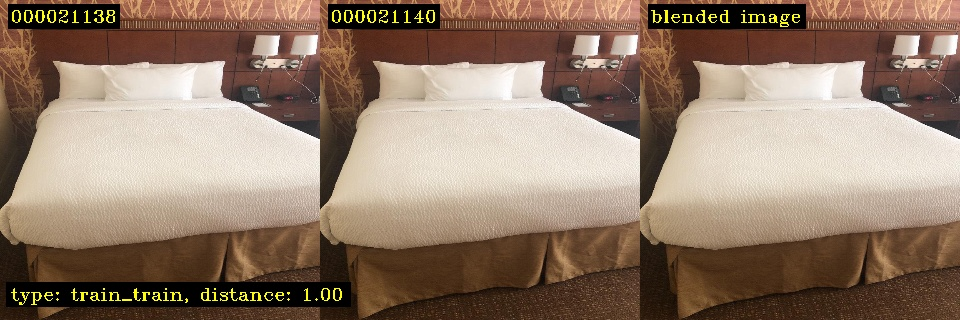
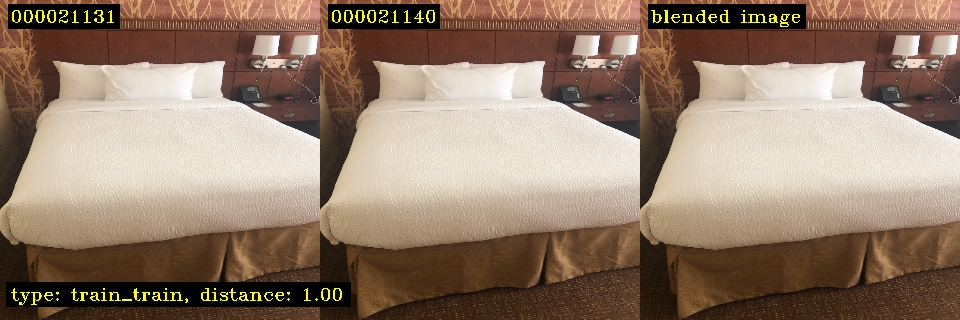
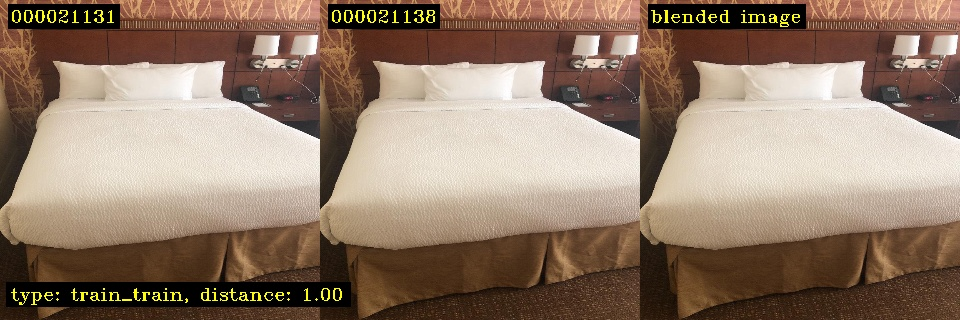
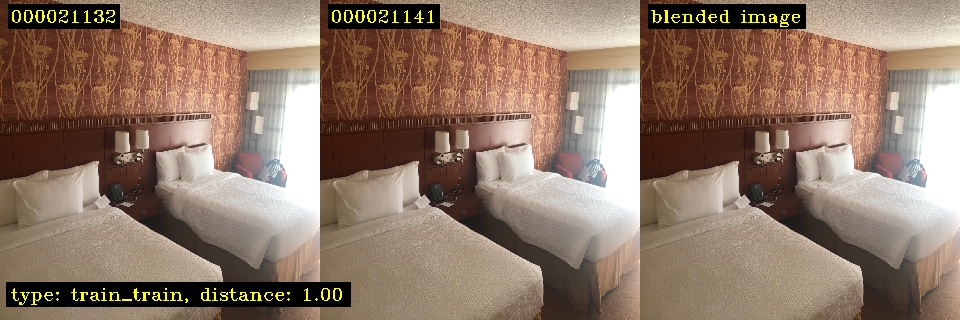
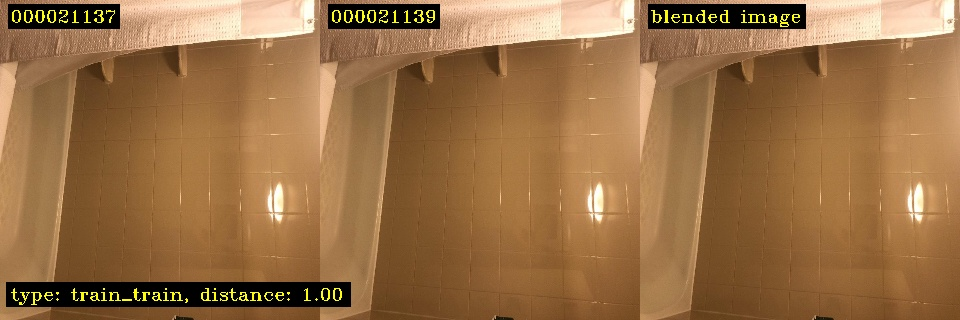
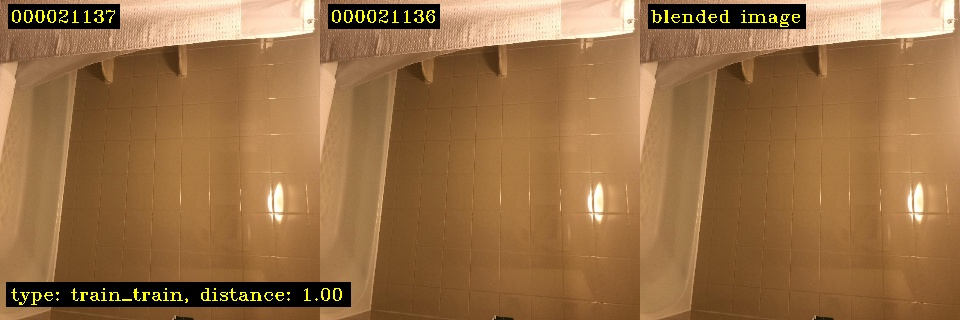
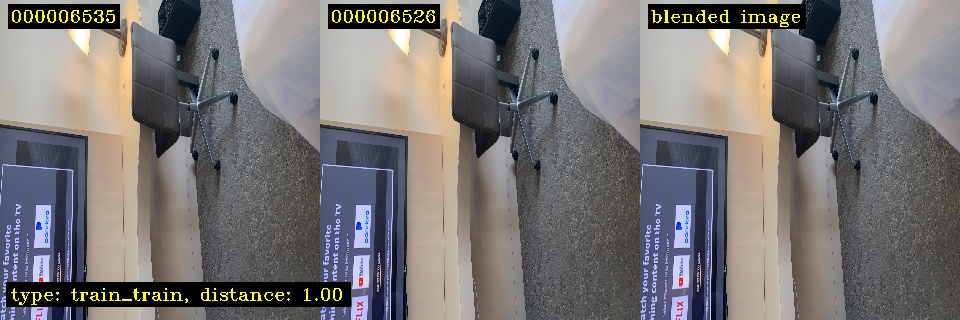
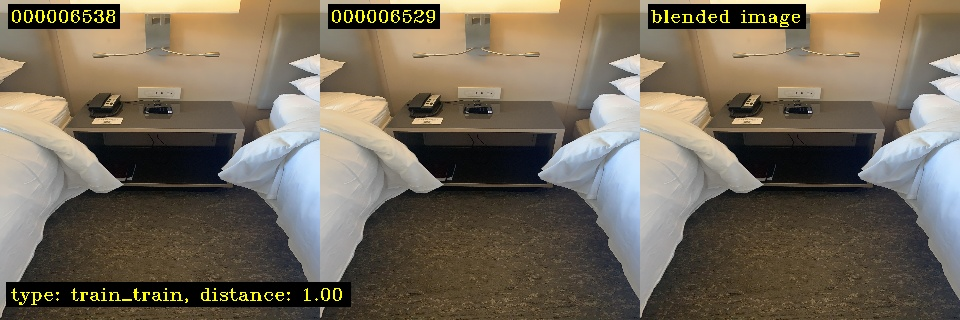

In [25]:
from IPython.display import HTML
gallery_file_name = os.path.join(gallery_save_path, 'similarity.html')
HTML(filename=gallery_file_name)